# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict the `percentage of marks` that a student is expected to score based upon the number of hours they studied.

### Author: **Akash Negi**

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data 
2. Understanding the structure of the data

In [7]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
#importing all the neccessory libraries
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [11]:
# Reading data from remote url
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data=pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
#looking at the shape of the data
data.shape

(25, 2)

## Step 2: Plotting the distribution of scores
Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

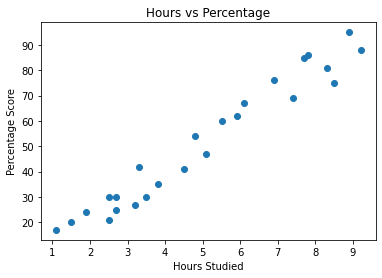

In [13]:
plt.scatter(data=data,x='Hours',y='Scores')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Step 3: Performing Simple Linear Regression

### Simple Linear Regression using `statsmodels`

We first assign the feature variable, `Hours`, in this case, to the variable `X` and the response variable, `Scores`, to the variable `y`.

In [14]:
X=data.iloc[:,0]
y=data.iloc[:,1]

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=100)

In [16]:
# Let's now take a look at the train dataset
print(X_train)


6     9.2
12    4.5
4     3.5
24    7.8
0     2.5
1     5.1
20    2.7
14    1.1
17    1.9
18    6.1
2     3.2
10    7.7
16    2.5
15    8.9
7     5.5
3     8.5
8     8.3
Name: Hours, dtype: float64


In [17]:
print(y_train)

6     88
12    41
4     30
24    86
0     21
1     47
20    30
14    17
17    24
18    67
2     27
10    85
16    30
15    95
7     60
3     75
8     81
Name: Scores, dtype: int64


#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [18]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [19]:
# Add a constant to get an intercept and fits the regression line using OLS
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()

In [20]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    1.495142
Hours    9.871714
dtype: float64

In [21]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Wed, 16 Jun 2021   Prob (F-statistic):           1.15e-11
Time:                        08:23:23   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.644      -5.260       8.250
Hours          9.8717      0.540     18.288      0.000       8.721      11.022
==============================================================================
Omnibus:                        4.576   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                1.488
Skew:                          -0.198   Prob(JB):                        0.475
Kurtosis:                       1.606   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

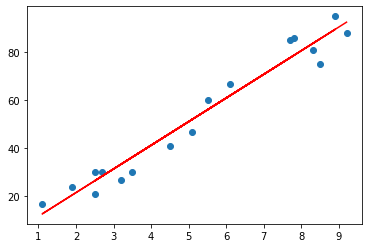

In [22]:
#plotting the regression line on the training data
plt.scatter(X_train,y_train)
plt.plot(X_train,1.8709+(X_train*9.8542),'r')

## Step 4: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [23]:
# Add a constant to X_test
X_test_sm=sm.add_constant(X_test)
# Predict the y values corresponding to X_test_sm
y_pred=lr.predict(X_test_sm)

In [24]:
# Comparing Actual vs Predicted
df=pd.DataFrame({'Actual score':y_test,'Predicted score':y_pred,'difference':(y_test-y_pred)})
df

,Actual score,Predicted score,difference
9,25,28.148771,-3.148771
22,35,39.007657,-4.007657
13,42,34.071800,7.928200
11,62,59.738257,2.261743
5,20,16.302714,3.697286
19,69,74.545829,-5.545829
23,76,69.609972,6.390028
21,54,48.879371,5.120629


In [25]:
# You can also test with given data
hours = 9.25
own_pred = lr.predict([[1,hours]])
print(f'No of Hours = {hours}')
print(f"Predicted Score = {own_pred[0]}")

No of Hours = 9.25
Predicted Score = 92.80850057353507


#### So predicted score is 92.80850057353507

## Step 5: Evaluation of the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [26]:
#importing metrics for the evaluation of the model
from sklearn.metrics import mean_squared_error , r2_score

In [27]:
#printing our the evaluated metrics
print('Root Mean Squared Error =' ,np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Score = ',r2_score(y_pred,y_test))

Root Mean Squared Error = 5.067387845160841
R2 Score =  0.9306089896680487


Thank You